Categories: flood, car crash, no crash ; Folders - 
Train - 150
valid - 50

In [61]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
#from fastai import *
from fastai.vision import *
#from fastai.core import *

In [62]:
bs = 32 # batch size
img_size = 24 # image size

In [63]:
path = Path('./new3')
path.ls() # output >>> ['test', 'labels.txt', 'train']

[WindowsPath('new3/models'),
 WindowsPath('new3/train'),
 WindowsPath('new3/valid')]

In [64]:
data = ImageDataBunch.from_folder(path, train='train', valid='valid',  ds_tfms=get_transforms(), size=224,bs = bs)

#data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid='test', size=img_size, bs = bs) 
# normalising the dataset using the same normalisation applied to the imagenet dataset


In [65]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (464 items)
[Category car_crash, Category car_crash, Category car_crash, Category car_crash, Category car_crash]...
Path: new3
x: ImageItemList (464 items)
[Image (3, 3840, 5760), Image (3, 956, 1300), Image (3, 641, 962), Image (3, 325, 578), Image (3, 1080, 1920)]...
Path: new3;

Valid: LabelList
y: CategoryList (151 items)
[Category car_crash, Category car_crash, Category car_crash, Category car_crash, Category car_crash]...
Path: new3
x: ImageItemList (151 items)
[Image (3, 675, 1200), Image (3, 720, 1280), Image (3, 480, 848), Image (3, 397, 550), Image (3, 720, 1280)]...
Path: new3;

Test: None

In [66]:
#data.show_batch(rows=3, figsize=(10,10))

In [67]:
print(data.classes)
len(data.classes),data.c

['car_crash', 'flood', 'nocrash']


(3, 3)

In [68]:
#https://docs.fast.ai/vision.learner.html
#learn = ConvLearner(data, models.resnet34, metrics=accuracy)  #old before fastai v1.0.14
learn = create_cnn(data, models.resnet18, metrics=accuracy)


In [69]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy
1,1.150085,0.809587,0.655629
2,0.786974,0.666013,0.761589
3,0.627997,0.729873,0.774834
4,0.535454,0.694319,0.754967
5,0.439716,0.684056,0.754967
6,0.399404,0.668448,0.754967


In [70]:
interp = ClassificationInterpretation.from_learner(learn)


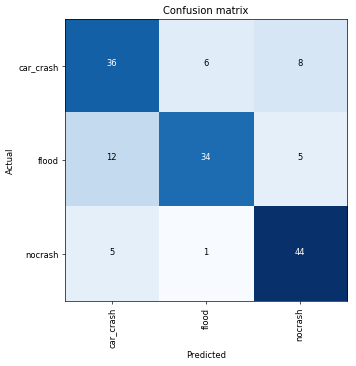

In [71]:
interp.plot_confusion_matrix(figsize=(8,6), dpi=60)

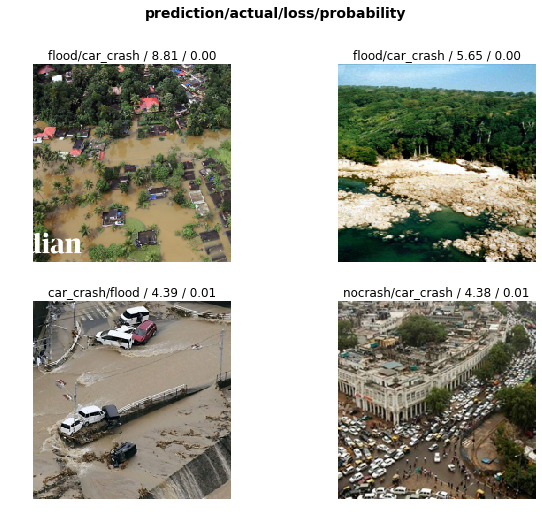

In [83]:
interp.plot_top_losses(4, figsize=(10,8))

In [74]:
#Return predicted class, label and probabilities for item.
img = learn.data.train_ds[2][0]
learn.predict(img)

(Category car_crash, tensor(0), tensor([0.9942, 0.0013, 0.0045]))

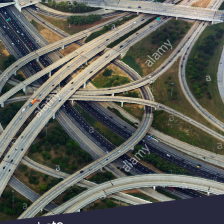

In [82]:
data.train_ds[400][0]